In [48]:
## Imports
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [217]:
## Setup headers and fonts

plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})        # use LaTeX

from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']
rcParams.update({'font.size': 12})




Header = ["Sources", "Targets", "DirectSumComparison","NumSources","NumTargets","Theta","Order","TreeType","MaxParNode", "BatchSize", "Kappa",
          "PotentialType","sflag","pflag","p","time_preproc", "TreeBuildTime", "time2", "time3", "time4", "time5",
          "time6", "time7", "time8", "time9", "time10", "time11", "TreecodeTime", "time13",
          "dpengglob", "tpengglob", "abs_pengerr", "RelativeError", "inferr", "relinferr", "2-norm Error", "Rel. 2-Norm Error"]


In [509]:
## Load Dataframe

# resultsFile='compareToLagrange.csv' 
# resultsFile='hermite_vs_lagrange_2365328.csv'
# resultsFile='hermite_vs_lagrange_10000000.csv'
# resultsFile='hermite_vs_lagrange_1000000.csv'
# resultsFile='hermite_vs_lagrange_100000.csv'
# resultsFile='hermite_vs_lagrange_nocheck_10000000.csv'


# resultsFile='hermite_vs_lagrange_cpu_100000.csv'
# resultsFile='hermite_vs_lagrange_gpu_100000.csv'
# resultsFile='hermite_vs_lagrange_gpu_check_100000.csv'
# resultsFile='hermite_vs_lagrange_gpu_check4x_100000.csv'
# resultsFile='hermite_vs_lagrange_gpu_check4x_withOr_100000.csv'

# resultsFile='hermite_vs_lagrange_gpu_check4x_smallEnoughLeaf_100000.csv'

# resultsFile='hermite_vs_lagrange_cpu_size2K_100000.csv'
# resultsFile='hermite_vs_lagrange_gpu_size2K_100000.csv'
# resultsFile='hermite_vs_lagrange_gpu_size2K_withOr_100000.csv'


# resultsFile='hermite_vs_lagrange_gpu_1000000.csv'
# resultsFile='hermite_vs_lagrange_gpu_noCheck_1000000.csv'
# resultsFile='hermite_vs_lagrange_gpu_yesCheck_1000000.csv'
resultsFile='hermite_vs_lagrange_gpu_yesCheck_10000000.csv'


resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/KITCpaperData/hermiteTesting/coulomb/'

df = pd.read_csv(resultsDir + resultsFile, names=Header)
# df = df.drop(df.index[:3])  # drop some rows of the 2365328 test case. 

In [510]:
## Plotting functions
def logAversusLogBcolorbyC(df,A,B,C,save=False,hline=False):
#     df = df.sort_values(by=B)
    fig, ax = plt.subplots(figsize=(8,6))
#     fig.suptitle('%s versus %s colored by %s' %(A,B,C))
    lagrange = df.loc[df['PotentialType']==0]
    hermite = df.loc[df['PotentialType']==4]
    
    grouped = lagrange.groupby(C)
    for name,group in grouped:
        if isinstance(name,str):
            group.plot(x=B, y=A, style='o-', ax=ax, loglog=True,label='Lagrange: %s = %s'%(C,name))
        elif isinstance(name,float):
            group.plot(x=B, y=A, style='o-', ax=ax, loglog=True,label='Lagrange: %s = %f'%(C,name))
        elif isinstance(name,int):
            group.plot(x=B, y=A, style='o-', ax=ax, loglog=True,label='Lagrange: %s = %i'%(C,name))
            
    grouped = hermite.groupby(C)
    for name,group in grouped:
        if isinstance(name,str):
            group.plot(x=B, y=A, style='*--', ax=ax, loglog=True,label='Hermite: %s = %s'%(C,name))
        elif isinstance(name,float):
            group.plot(x=B, y=A, style='*--', ax=ax, loglog=True,label='Hermite: %s = %f'%(C,name))
        elif isinstance(name,int):
            group.plot(x=B, y=A, style='*--', ax=ax, loglog=True,label='Hermite: %s = %i'%(C,name))
        
    plt.xlabel(B)
    plt.ylabel(A)
    
    if hline!=False:
#     plt.axhline(y=62.6, color='r', linestyle='-')
#         plt.axhline(y=hline, color='r', linestyle='-')
        plt.axhline(y=1698, color='r', linestyle='-') # for 10 million
#     plt.axhline(y=10**6, color='r', linestyle='--') # CPU DS for 10 million
    plt.grid()
#     plt.ylim([20,100])
    
    plt.legend(loc = 'best')

    if save != False:
        saveID = save
        plt.savefig(saveID+'.png', bbox_inches='tight',format='png')
    plt.show()
    
def logAversusBcolorbyC(df,A,B,C,save=False,hline=False):
#     df = df.sort_values(by=B)
    fig, ax = plt.subplots(figsize=(8,6))
#     fig.suptitle('%s versus %s colored by %s' %(A,B,C))
    lagrange = df.loc[df['PotentialType']==0]
    hermite = df.loc[df['PotentialType']==4]
    
    grouped = lagrange.groupby(C)
    for name,group in grouped:
        if isinstance(name,str):
            group.plot(x=B, y=A, style='o-', ax=ax, logy=True,label='Lagrange: %s = %s'%(C,name))
        elif isinstance(name,float):
            group.plot(x=B, y=A, style='o-', ax=ax, logy=True,label='Lagrange: %s = %f'%(C,name))
        elif isinstance(name,int):
            group.plot(x=B, y=A, style='o-', ax=ax, logy=True,label='Lagrange: %s = %i'%(C,name))
            
    grouped = hermite.groupby(C)
    for name,group in grouped:
        if isinstance(name,str):
            group.plot(x=B, y=A, style='*--', ax=ax, logy=True,label='Hermite: %s = %s'%(C,name))
        elif isinstance(name,float):
            group.plot(x=B, y=A, style='*--', ax=ax, logy=True,label='Hermite: %s = %f'%(C,name))
        elif isinstance(name,int):
            group.plot(x=B, y=A, style='*--', ax=ax, logy=True,label='Hermite: %s = %i'%(C,name))
        
    plt.xlabel(B)
    plt.ylabel(A)
    
    if hline!=False:
#     plt.axhline(y=62.6, color='r', linestyle='-')
        plt.axhline(y=hline, color='r', linestyle='-')
#     plt.axhline(y=1278, color='r', linestyle='-') # for 10 million
#     plt.axhline(y=10**6, color='r', linestyle='--') # CPU DS for 10 million
    plt.grid()
#     plt.ylim([20,100])
    
    plt.legend(loc = 'best')

    if save != False:
        saveID = save
        plt.savefig(saveID+'.png', bbox_inches='tight',format='png')
    plt.show()

<IPython.core.display.Javascript object>


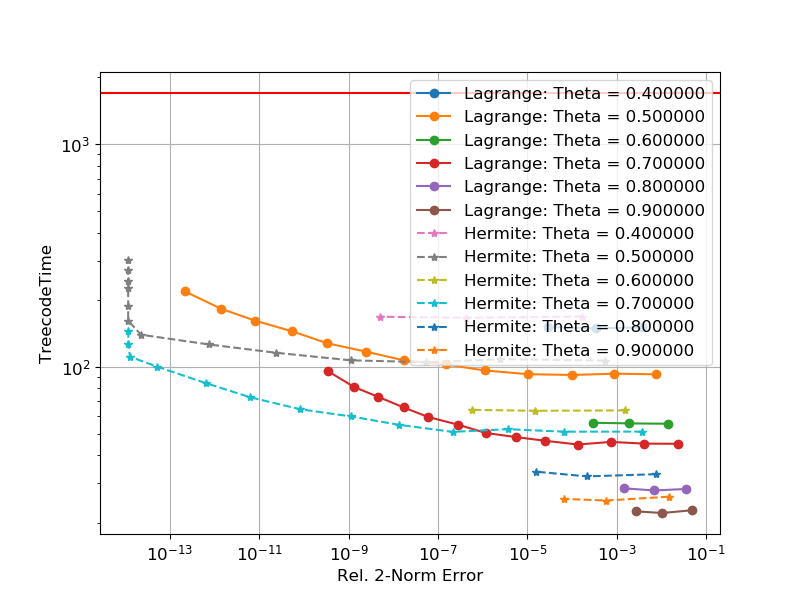

<IPython.core.display.Javascript object>


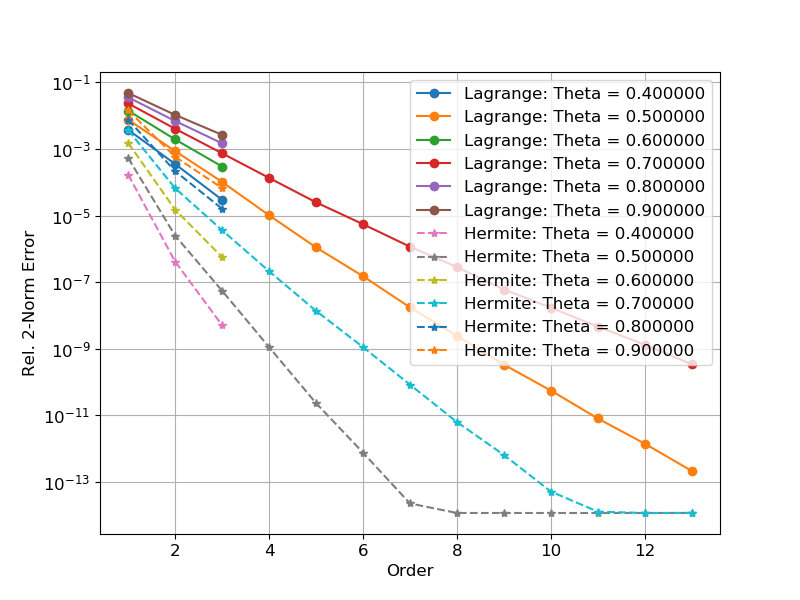

In [511]:
## Random Particle Calculation

saveDir = '/Users/nathanvaughn/Google Drive/Research/Presentations/2019/05-30-2019/random/'
df2 = df.sort_values(by=['Order'])
# df2 = df2.loc[df['Theta']==0.7]

# logAversusLogBcolorbyC(df2,'TreecodeTime','RelativeError','Order',save=saveDir+'10mil_PotentialError_order7')
# logAversusLogBcolorbyC(df2,'TreecodeTime','Rel. 2-Norm Error','Order',save=saveDir+'10mil_2Norm_order7')
# logAversusLogBcolorbyC(df2,'TreecodeTime','inferr','Order',save=saveDir+'10mil_InfError_order7')

logAversusLogBcolorbyC(df2,'TreecodeTime','Rel. 2-Norm Error','Theta',hline=11.7, save=saveDir+'10M_timing_yesCheck')
# logAversusLogBcolorbyC(df2,'inferr','Order','Theta',save=saveDir+'100k_PvsT_order8_inferr')
# logAversusLogBcolorbyC(df2,'Rel. 2-Norm Error','Order','Theta')
logAversusBcolorbyC(df2,'Rel. 2-Norm Error','Order','Theta',save=saveDir+'10M_scaling_yesCheck')
# logAversusBcolorbyC(df2,'inferr','Order','Theta')



In [246]:
## Hartree Potential Calculation

# # saveDir = '/Users/nathanvaughn/Google Drive/Research/Presentations/2019/05-30-2019/random/'
# saveDir = '/Users/nathanvaughn/Google Drive/Research/Presentations/2019/05-30-2019/Hartree/'
# # df = df.loc[df['Theta']<0.85]
# # df = df.loc[df['BatchSize']==10000]
# df.sort_values(by=['Theta'], inplace=True)
# logAversusLogBcolorbyC(df,'TreecodeTime','RelativeError','Order',save=saveDir+'2.3mil_totalPotential')
# logAversusLogBcolorbyC(df,'TreecodeTime','Rel. 2-Norm Error','Order',save=saveDir+'2.3mil_2Norm')
# logAversusLogBcolorbyC(df,'TreecodeTime','inferr','Order',save=saveDir+'2.3mil_InfErr')
# logAversusLogBcolorbyC(df,'TreecodeTime','Rel. 2-Norm Error','Order',save=saveDir+'10mil_2Norm')
# logAversusLogBcolorbyC(df,'TreecodeTime','Theta','Order')
# logAversusLogBcolorbyC(df,'inferr','Theta','Order')
# logAversusLogBcolorbyC(df,'TreecodeTime','RelativeError','BatchSize')


<IPython.core.display.Javascript object>


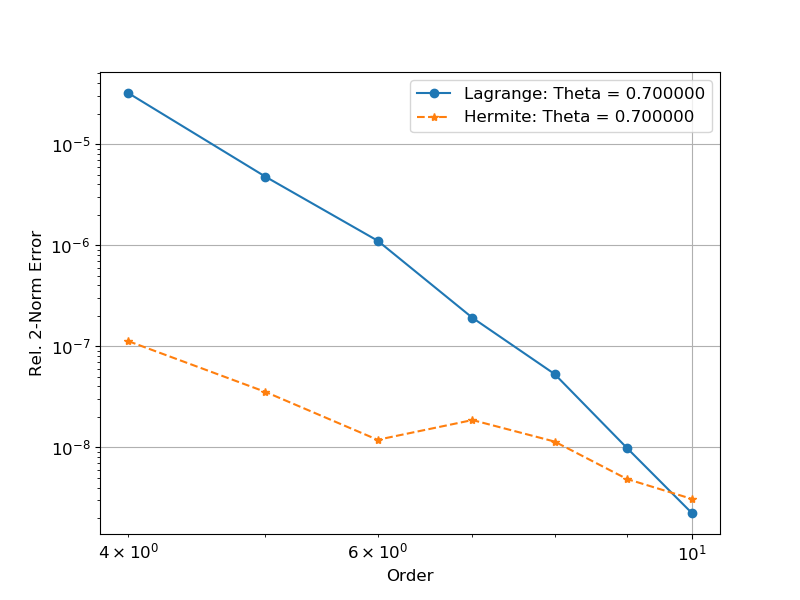

In [420]:
## Random Particle Calculation

saveDir = '/Users/nathanvaughn/Google Drive/Research/Presentations/2019/05-30-2019/random/'
df = df.loc[df['BatchSize']==10000]
df = df.loc[df['Theta']==0.7]
df = df.sort_values(by=['Order'])
# logAversusLogBcolorbyC(df,'TreecodeTime','RelativeError','Order',save=saveDir+'10mil_PotentialError_order7')
# logAversusLogBcolorbyC(df,'TreecodeTime','Rel. 2-Norm Error','Order',save=saveDir+'10mil_2Norm_order7')
# logAversusLogBcolorbyC(df,'TreecodeTime','inferr','Order',save=saveDir+'10mil_InfError_order7')

# logAversusLogBcolorbyC(df,'TreecodeTime','Theta','Order',save=saveDir+'10mil_PvsT_order8_time')
# logAversusLogBcolorbyC(df,'inferr','Theta','Order',save=saveDir+'10mil_PvsT_order8_inferr')
# logAversusLogBcolorbyC(df,'Rel. 2-Norm Error','Theta','Order',save=saveDir+'10mil_PvsT_order8_L2err')

# logAversusLogBcolorbyC(df,'TreecodeTime','Order','Theta',save=saveDir+'10mil_PvsT_theta0.7_time')
# logAversusLogBcolorbyC(df,'inferr','Order','Theta',save=saveDir+'10mil_PvsT_theta0.7_inferr')
logAversusLogBcolorbyC(df,'Rel. 2-Norm Error','Order','Theta',save=saveDir+'10mil_PvsT_theta0.7_L2err')

# logAversusLogBcolorbyC(df,'TreecodeTime','Order','Theta',save=saveDir+'10mil_PvsT_theta0.5_time')
# logAversusLogBcolorbyC(df,'inferr','Order','Theta',save=saveDir+'10mil_PvsT_theta0.5_inferr')
# logAversusLogBcolorbyC(df,'Rel. 2-Norm Error','Order','Theta',save=saveDir+'10mil_PvsT_theta0.5_L2err')

# df = df.sort_values(by=['Theta'])
# # logAversusLogBcolorbyC(df,'TreecodeTime','RelativeError','Order')
# logAversusLogBcolorbyC(df,'TreecodeTime','Rel. 2-Norm Error','Order')
